In [2]:
import pandas as pd

import yfinance as yf



In [3]:
aapl = yf.Ticker("AAPL") # creert een financieel object met de aandelen van APPLE INC
aapl_df = aapl.history(period="1y") #historische gegevens op van het betreffende aandeel.

In [4]:
aapl_df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-20 00:00:00-04:00,154.246700,156.982099,153.331571,156.564316,73641400,0.0,0.0
2023-03-21 00:00:00-04:00,156.484741,158.553684,155.708868,158.434326,73938300,0.0,0.0
2023-03-22 00:00:00-04:00,158.454231,161.279149,156.972137,156.992035,75701800,0.0,0.0
2023-03-23 00:00:00-04:00,157.986722,160.692282,156.842818,158.086182,67622100,0.0,0.0
2023-03-24 00:00:00-04:00,158.016551,159.488688,157.011919,159.399170,59196500,0.0,0.0


<Axes: title={'center': 'AAPL Sluitingsprijs Over Het Laatste Jaar'}, xlabel='Date'>

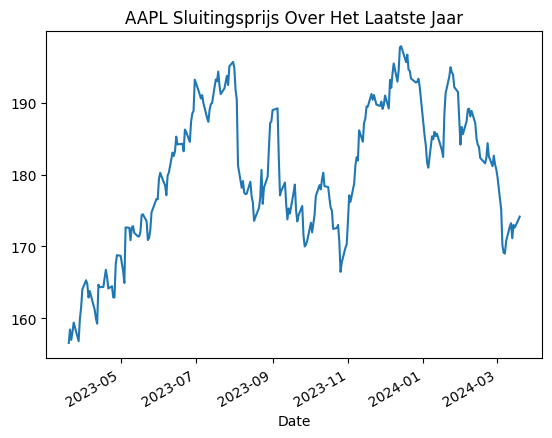

In [5]:
aapl_df['Close'].plot(title="AAPL Sluitingsprijs Over Het Laatste Jaar")

In [6]:
aapl_df.shape

(252, 7)

In [7]:
aapl_df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [8]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-03-20 00:00:00-04:00 to 2024-03-19 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Dividends     252 non-null    float64
 6   Stock Splits  252 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.8 KB


In [9]:
# Bepaal de index van de 'Close' kolom
close_col_pos = list(aapl_df.columns).index('Close') + 1

# Voeg de 'Daily Return' kolom toe direct na de 'Close' kolom
aapl_df.insert(close_col_pos, 'Daily Return', aapl_df['Close'].pct_change()) #ptc change pakt het verschil met de vorige column




In [10]:
aapl_df.iloc[:10, [0,3,4]]

,Open,Close,Daily Return
Date,,,
2023-03-20 00:00:00-04:00,154.246700,156.564316,NaN
2023-03-21 00:00:00-04:00,156.484741,158.434326,0.011944
2023-03-22 00:00:00-04:00,158.454231,156.992035,-0.009103
2023-03-23 00:00:00-04:00,157.986722,158.086182,0.006969
2023-03-24 00:00:00-04:00,158.016551,159.399170,0.008306
2023-03-27 00:00:00-04:00,159.090826,157.439636,-0.012293
2023-03-28 00:00:00-04:00,157.131281,156.812973,-0.003980
2023-03-29 00:00:00-04:00,158.523852,159.916428,0.019791
2023-03-30 00:00:00-04:00,160.672376,161.497971,0.009890


In [11]:
aapl_df['Daily Return'].sum()

0.12409090795952227

Percentage van dagen binnen de standaardafwijking: 75.79%
Percentage van dagen buiten de standaardafwijking: 23.81%


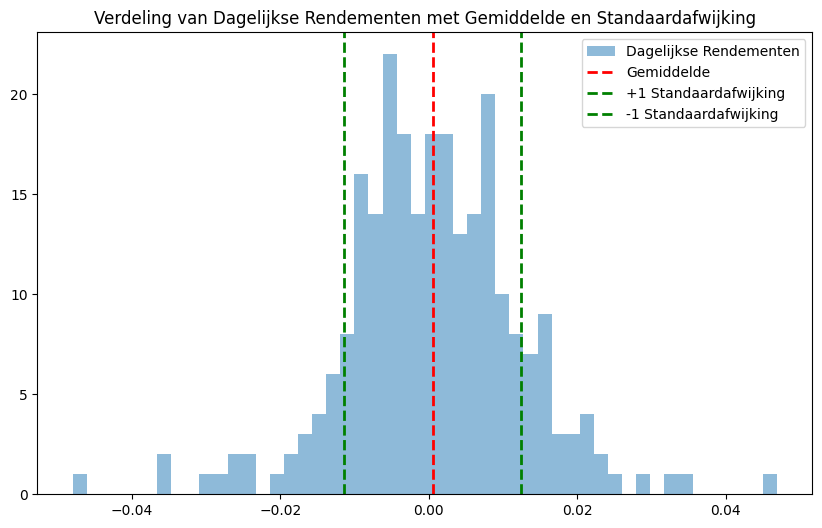

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Stel dat 'aapl_df' je DataFrame is en 'Daily Return' de kolom met dagelijkse rendementen

# 1. Bereken het gemiddelde en de standaardafwijking
gemiddelde = aapl_df['Daily Return'].mean()
std_dev = aapl_df['Daily Return'].std()

# 2. Bepaal een drempelwaarde voor de afwijking
drempel_boven = gemiddelde + std_dev
drempel_onder = gemiddelde - std_dev

# 3. Identificeer dagen binnen/buiten drempelwaarden
binnen_drempel = aapl_df[(aapl_df['Daily Return'] <= drempel_boven) & (aapl_df['Daily Return'] >= drempel_onder)]
buiten_drempel = aapl_df[(aapl_df['Daily Return'] > drempel_boven) | (aapl_df['Daily Return'] < drempel_onder)]

# Percentage van dagen binnen en buiten de drempel
percentage_binnen = (binnen_drempel.shape[0] / aapl_df.shape[0]) * 100 #schape[0] pakt rijen
percentage_buiten = (buiten_drempel.shape[0] / aapl_df.shape[0]) * 100

print(f"Percentage van dagen binnen de standaardafwijking: {percentage_binnen:.2f}%")
print(f"Percentage van dagen buiten de standaardafwijking: {percentage_buiten:.2f}%")

# 4. Plot de resultaten
plt.figure(figsize=(10, 6))
plt.hist(aapl_df['Daily Return'], bins=50, alpha=0.5, label='Dagelijkse Rendementen') #bins wil zeggen dat data verdelen in 50 gelijke delen. 
plt.axvline(gemiddelde, color='r', linestyle='dashed', linewidth=2, label='Gemiddelde')
plt.axvline(drempel_boven, color='g', linestyle='dashed', linewidth=2, label='+1 Standaardafwijking')
plt.axvline(drempel_onder, color='g', linestyle='dashed', linewidth=2, label='-1 Standaardafwijking')
plt.title('Verdeling van Dagelijkse Rendementen met Gemiddelde en Standaardafwijking')
plt.legend()
plt.show()

# UITLEG GRAFIEF
>bins
De bins zijn in de code gelijk gesteld aan 50 wat wil zeggen dat de totale x as, voor het gemak -0.08 totaal aan x waarden onderverdeeld worden in 50 gelijke delen die el een bereik hebben van 0,0016.
>y-as
De y-as geeft aan hoeveel waarden, dus hoeveel data, in dit geval hoeveel dagen, het dageljks rendement valt bijvoorbeeld onder het bereik 0,00 tot 0,0016.
> De standaard deviatie geeft aan dat de data gemiddeld gezien het meest binnen die waarde zullen afwijken van het gemiddelde


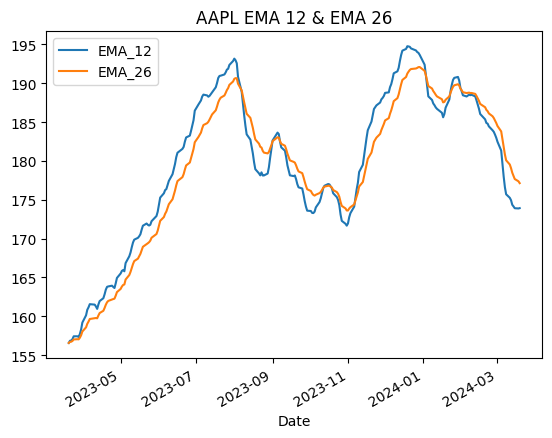

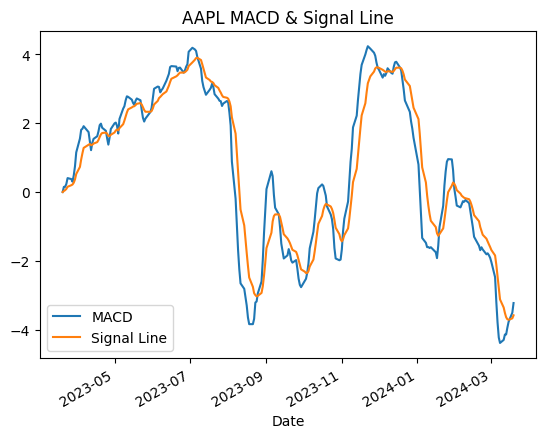

In [13]:

def calculate_macd_and_ema(data, slow=26, fast=12, signal=9):
    # Bereken de snelle en trage EMA's
    fast_ema = data['Close'].ewm(span=fast, adjust=False).mean()
    slow_ema = data['Close'].ewm(span=slow, adjust=False).mean()
    # Bereken de MACD en de Signaallijn
    data['MACD'] = fast_ema - slow_ema
    data['Signal Line'] = data['MACD'].ewm(span=signal, adjust=False).mean()
    # Bewaar de EMA's van 12 en 26 dagen
    data['EMA_12'] = fast_ema
    data['EMA_26'] = slow_ema
    # De EMA van 9 dagen is al de Signaallijn, dus niet opnieuw berekend

# Aannemende dat `aapl_df` je DataFrame is met Apple's slotkoersen en een 'Close' kolom
calculate_macd_and_ema(aapl_df)

# Plot de EMA's van 12 en 26 dagen in één grafiek
aapl_df[['EMA_12', 'EMA_26']].plot(title='AAPL EMA 12 & EMA 26')
plt.show()

# Plot de MACD en de Signaallijn (EMA van 9 dagen) in een andere grafiek
aapl_df[['MACD', 'Signal Line']].plot(title='AAPL MACD & Signal Line')
plt.show()




# Wiskundige formule EMA 

$$\begin{aligned} 
EMA_t = (V_t*K) + (EMA_{t-1} * (1 - K)) \\ \\ \frac{2}{(N+1)} \\ \\(V_t*\frac{2}{N+1}) + (EMA_{t-1} * (1 - \frac{2}{N+1})) \\ \\ EMA_{T}= Ema van vandaag \\ \\ V_{T}= Prijs van vandaag \\ \\ EMA_{T-1}=Prijsvangisteren \\ \\ K \ wegingsfactor \\ \\ K=\frac{2}{N+1} \end{aligned} $$

obsidian://open?vault=O.%20Obsidian_Notes&file=2.%20Coding%2FPython%2FPandas%2Fextra%20uitleg%2FBegrippen%2FFinance%20in%20pandas%2FMoving%20Average%20Convergence%20Divergence%20(MACD)

### EMA_fast_12 en 16
De grafiek laat de gemiddelde close waarden zien gepresenteerd als een wiskuding resultaat van de EMA berekening die meer gewicht heeft aan recente prijzen. De eerste 12 dagen wordt een rekenkundig gemiddelde van gemaakt, daarna wordt bovenstaande formule toegepast.
### Wegingsfactor K
Bij een kleine N is de K relatief groter dan bij een grotere N. Dit zorgt vervoor dat recente dagen procentueel gezien meer bijdragen aan de totaal waarde bij de berekening van de EMA vandaag

### MACD
Dit duidt de relatie aan tussen de snelle EMA en de trage EMA via de formule $ MACD = EMA_{fast} - EMA_{slow} $ Als de slow groter is dan de fast dan wil dat zeggen dat recentere prijzen gemiddeld lager zitten dan de prijzen die gemiddeld zijn berekend door meer gewicht te geven aan de oudere dagen. 



In [14]:
aapl_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Daily Return', 'Volume', 'Dividends',
       'Stock Splits', 'MACD', 'Signal Line', 'EMA_12', 'EMA_26'],
      dtype='object')

In [ ]:

MA25_pos = list(aapl_df.columns).index('Close') + 1


aapl_df.insert(MA25_pos,'MA_25',  aapl_df['Close'].rolling(window=25).mean())


aapl_df[['MA_25', 'MA_50']].plot(title='Pieter zijn hersencellen')
plt.show()


>moving average
simpel concept: ma25 is gemiddelde van de eerste 25 data als startpunt en daarna dag 1 weghalen en dag 21 toevoegen is nieuw gemiddelde


In [16]:
aapl_df.columns

Index(['Open', 'High', 'Low', 'Close', 'MA_25', 'Daily Return', 'Volume',
       'Dividends', 'Stock Splits', 'MACD', 'Signal Line', 'EMA_12', 'EMA_26'],
      dtype='object')

<Axes: xlabel='Date'>

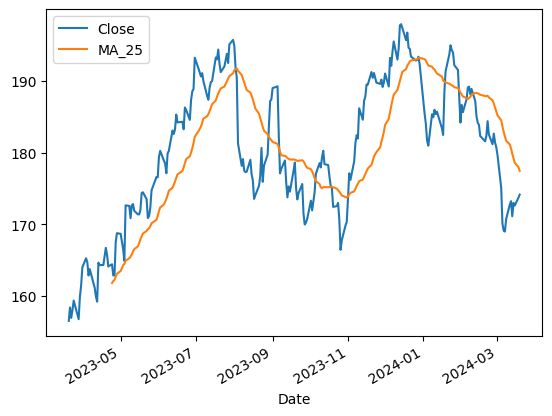

In [19]:
aapl_df[['Close', 'MA_25']].plot()

In [20]:
nieuwskoppen = [ "Apple onthult revolutionaire nieuwe iPhone", "Apple aandelen dalen na teleurstellende verkoopcijfers", "Apple zet grote stap in kunstmatige intelligentie sector"

]


In [22]:
from textblob import TextBlob

for kop in nieuwskoppen:
    sentiment = TextBlob(kop).sentiment.polarity
    print(f"Nieuwskop: '{kop}', Sentiment: {'Positief' if sentiment > 0 else 'Negatief' if sentiment < 0 else 'Neutraal'}")


0.0
Nieuwskop: 'Apple onthult revolutionaire nieuwe iPhone', Sentiment: Neutraal
0.0
Nieuwskop: 'Apple aandelen dalen na teleurstellende verkoopcijfers', Sentiment: Neutraal
0.0
Nieuwskop: 'Apple zet grote stap in kunstmatige intelligentie sector', Sentiment: Neutraal


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

  

model = ARIMA(aapl_df['Close'], order=(5,1,2))

result = model.fit()

print(result.summary())